# Data Munging with Pandas

**Table of Contents**
    1. Let's load the dataset
    2. Let's plot the dataset
        2.1  scatter_matrix
        2.2  Bar plot
        2.3  Histogram
        2.4  Box plot
        2.5  Area plot
        2.6  Scatter plot
        2.7  Hexbin plot
        2.8  Pie plot
        2.9  Missing data on plots
        2.10 Density/KDE plots
        2.11 Andrews Curves
        2.12 Parallel Coordinates
        2.13 Lag plot
        2.14 Autocorrelation plot
        2.15 Bootstrap plot
        2.16 RadVis plot
    3. Data holders
        3.1 Series
            3.1.1 Series from ndarray
            3.1.2 Series from dict
            3.1.3 Series from scalar
        3.2 DataFrame
            3.2.1 DataFrame from dict of Series o dicts
            3.2.2 DataFrame from dict of ndarrays
            3.2.3 DataFrame from structured/record arrays
            3.2.4 DataFrame from lists of dicts 
            3.2.5 DataFrame from dict of tuples
            3.2.6 DataFrame from Series
    4. Dealing with missing data
        


Let's focus on the Pandas dataframe Munging stuff

The modules that we'll need:


In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
from sklearn import tree

In [4]:
import pandas as pd


## 1. Let's load the dataset

We'll load one of the example datasets from sklearn!


In [5]:
from sklearn import datasets

In [6]:
iris = datasets.load_iris()

----

This is a sklearn dataset including the 
-  `.DESCR` : general description
- `.data`  : all features
- `.features_names` : names of features
- `.target` : target values expressed as values / numbered classes
- `.target_names` : names of the target classes 
-  `.shape` : can be applied both on `.data` and `.target` and give the `(row,column)` tuple


In [7]:
iris.DESCR;
iris.data;
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris.target;
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [9]:
iris.data.shape

(150, 4)

In [10]:
type(iris.data)

numpy.ndarray

---
Let's use pandas' to convert the ndarray into dataframe, keeping the column names!

In [11]:
dataframe = pd.DataFrame(iris.data, columns=iris.feature_names)

In [12]:
dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
target_df = pd.DataFrame(iris.target, columns=['Species'])

In [14]:
target_df.tail(2)

,Species
148,2
149,2


---

---

## 2. Let's plot the dataset!

### 2.1 Scatter_matrix

Using pandas' **`scatter_matrix`** function.
This is similar to R's `pairs` and makes a quick scatter plot map for the quantitative
features of the dataframe

First we'll make a list named colors as a book-keeper.
Then to visualise the different target categories (i.e. the Species) we'll use the target numerical categorisation (0,1,2) to differently colour each row of the dataframe based on the target variable

In [15]:
colors = list()

In [16]:
palette = { 0: "red", 1: "green", 2:"blue"}

In [17]:
for c in np.nditer(iris.target):
    colors.append(palette[int(c)])  # c is 0,1 or 2 and we append red, green blue 

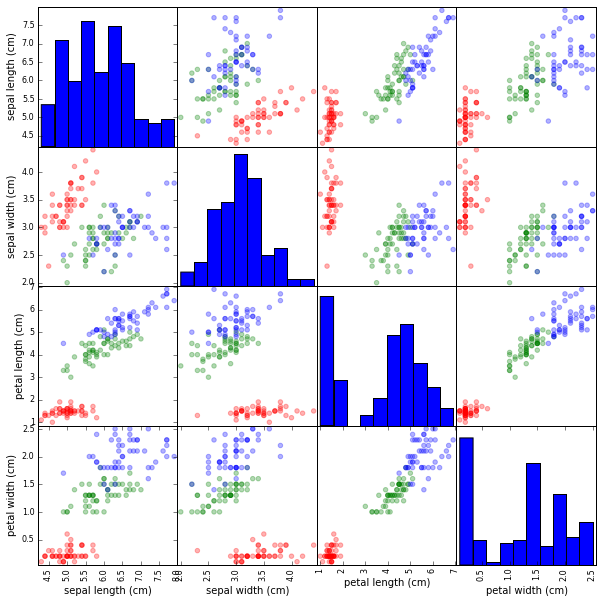

In [18]:
scatterplot = pd.scatter_matrix(dataframe, 
                               alpha    = 0.3,
                               figsize  = (10,10),
                               diagonal = 'hist', #'kde'
                               color    = colors, 
                               marker   = 'o',
                               grid     = True)

--- 

There are various [plot methods](http://pandas.pydata.org/pandas-docs/stable/visualization.html) inside pandas.

Now to make the scatter plot matrix

### 2.2 A bar plot

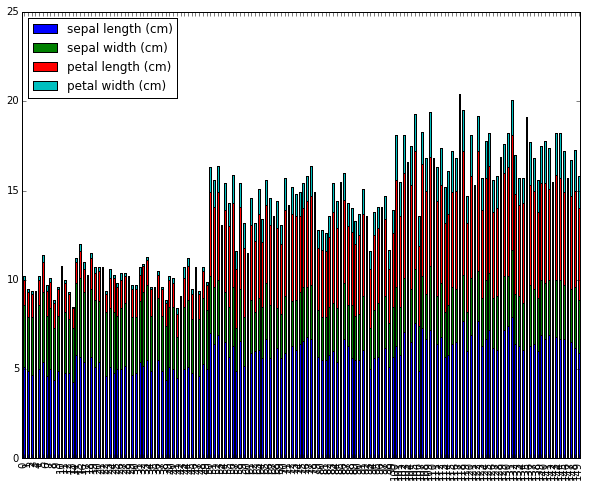

In [19]:
dataframe.plot(kind='bar', stacked=True, figsize=(10,8)) #barh

---
### 2.3 Histogram (for one column, for all, or split by [diff](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.diff.html) )

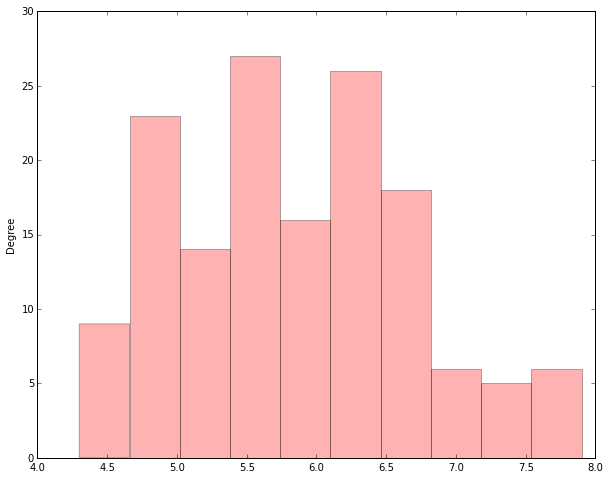

In [20]:
dataframe['sepal length (cm)'].plot(kind='hist', color='red', alpha=0.3, figsize=(10,8))

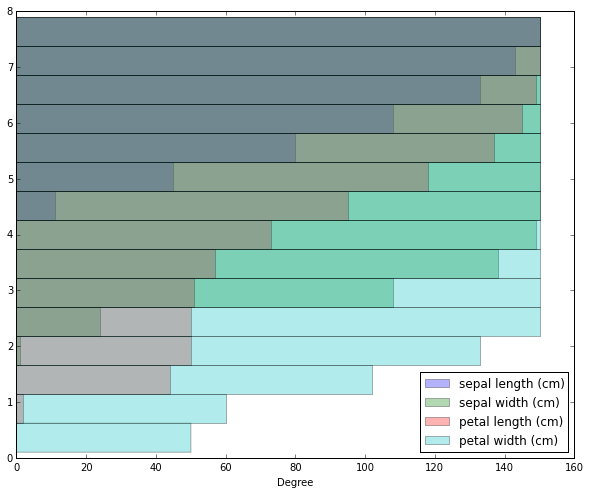

In [21]:
dataframe.plot(kind='hist', alpha=0.3, orientation='horizontal', 
               cumulative=True, bins=15, figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f774210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10fa2a610>]], dtype=object)

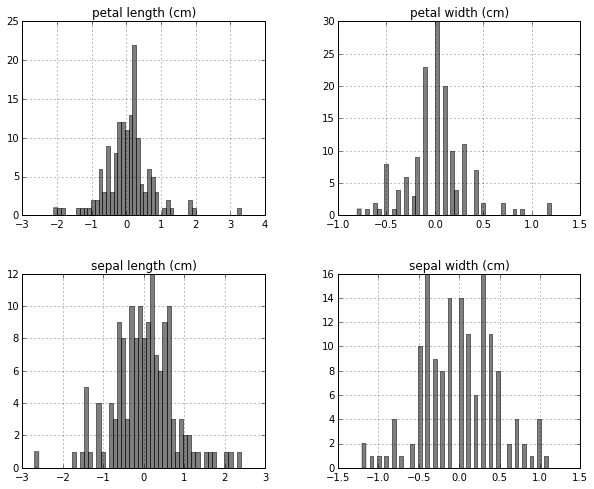

In [22]:
dataframe.diff().hist(color='k', alpha=0.5, bins=50, figsize=(10,8))
                    # diff() gets the difference of all
                    # rows with row-0 

---
### 2.4 Box plots

Let's remind here that box plot is a convenient way of depicting groups of numerical data and their quartiles. 

The **first quartile** is the **25th percentile** (splits off the lowest 25% of data from the highest 75%), **the second quartile (median)** is the **50th percentile** (cuts the dataset in half) and the **third quartile** is the **upper quartile** or the **75th percentile** (splits off the highest 25% from the lowest 75%). **IRQ** (interquantile range) is the difference between upper and lower quartiles IRQ=Q3-Q1).

The line is the median (Q2 or 50%). 
The box represents the IRQ, the from median to highest values is the Q2 to Q3 region, while the lowest is the Q1 to Q2 region. 


```
      _____   -> maximum
        |
        |
       ---    -> third quartile
      |   |
      |___|   -> median (Q2)
      |   |
      |   |
       ---    -> first quartile
        |
        |
      _____   -> minimum  

```



** Outliers ** --> 3 x IRQ

** Suspected Outliers ** 1.5 x IRQ


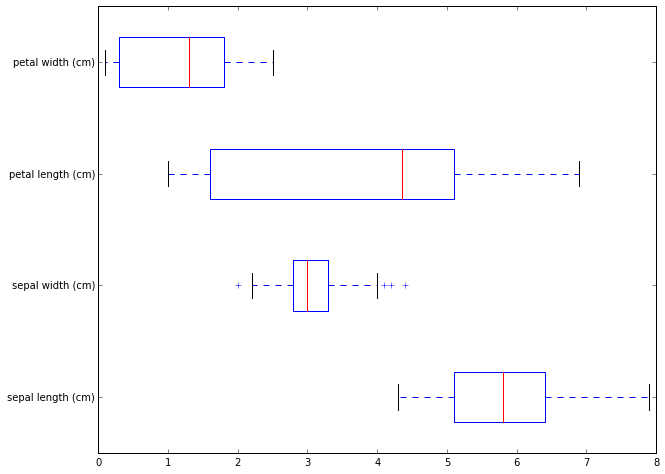

In [23]:
dataframe.plot(kind='box', vert=False, by='X', figsize=(10,8))

--- 

### 2.5 Area plots!

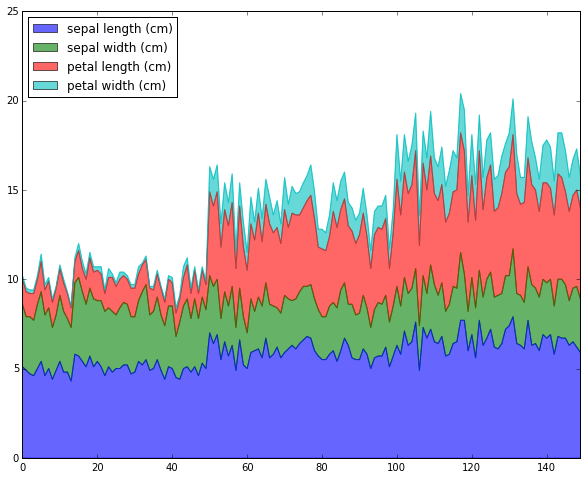

In [24]:
dataframe.plot(kind='area', alpha=0.6, figsize=(10,8))

---
### 2.6 Scatter Plots

- Defining the x and y axis
- plotting two sets with the ax=ax
- palette height



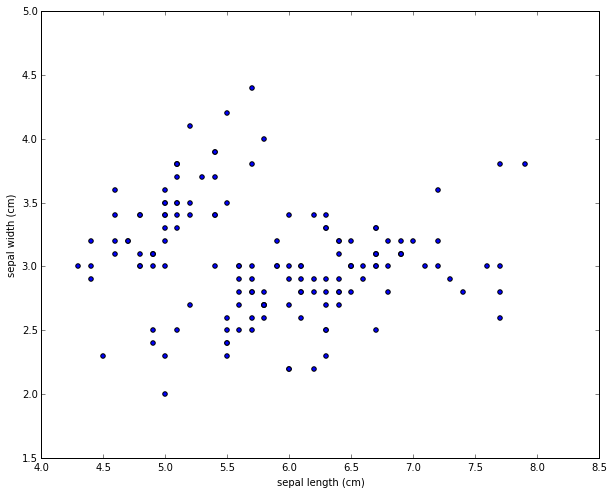

In [25]:
dataframe.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', figsize=(10,8))

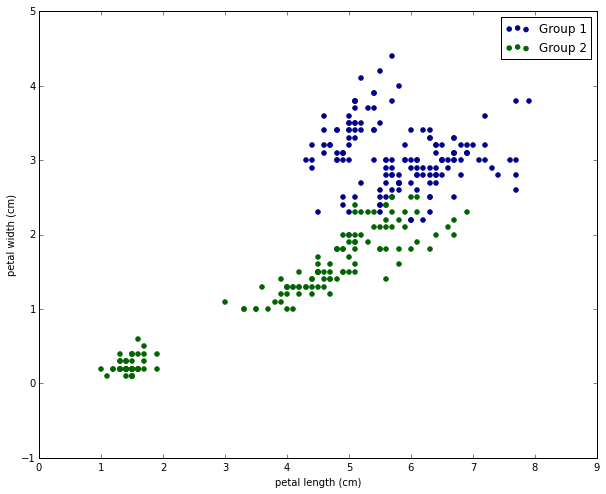

In [26]:
ax = dataframe.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', 
                    color='DarkBlue', label='Group 1');
dataframe.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', 
                    color='DarkGreen', label='Group 2' , figsize=(10,8),
                    ax=ax); # ax = ax to overlay
                            # if not set 2 plots made

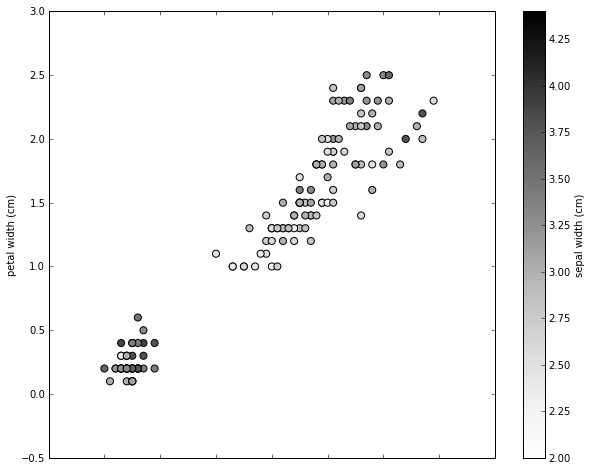

In [27]:
dataframe.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', 
               c='sepal width (cm)', s=50, figsize=(10,8))

---
### 2.7 Hexbin

*Hexbin are alternative to scatter plots if the data are too dense to plot individually*

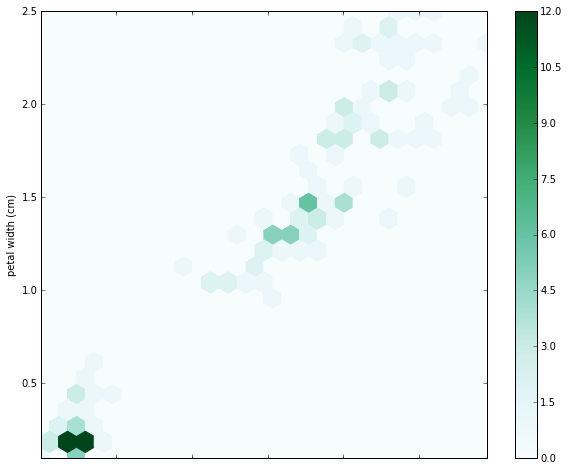

In [28]:
dataframe.plot(kind='hexbin', x='petal length (cm)', y='petal width (cm)', 
               gridsize=25, figsize=(10,8))
               

---

### 2.8 Pie plots 

Pies are good for series

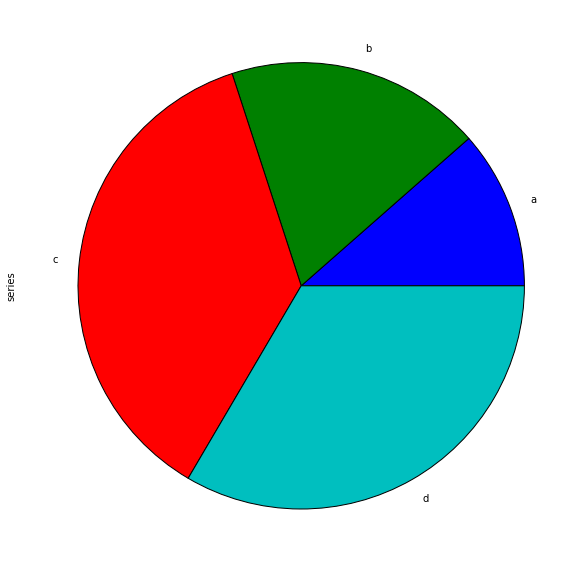

In [29]:
series = pd.Series(3 * np.random.rand(4), index=['a', 'b', 'c', 'd'], name='series')
series.plot(kind='pie', figsize=(10,10))

---

### 2.9 Missing data

Depending on the plot type pandas handle by default the NAs

Plot type | Handling
---|---
Line  | Leave gaps at NA
Line stacked | Fill 0's
Bar | Fill 0's
Scatter | Drop NA
Histogram | Drop NA
Box | Drop NA
Area | Fill 0's
KDE (density) | Fill 0's
Hexbin | Drop NA
Pie | Fill 0


If this is not the wanted behaviour use: **`fillna()`** or **`dropna()`** before plotting

---
### 2.10  Density/KDE Plot

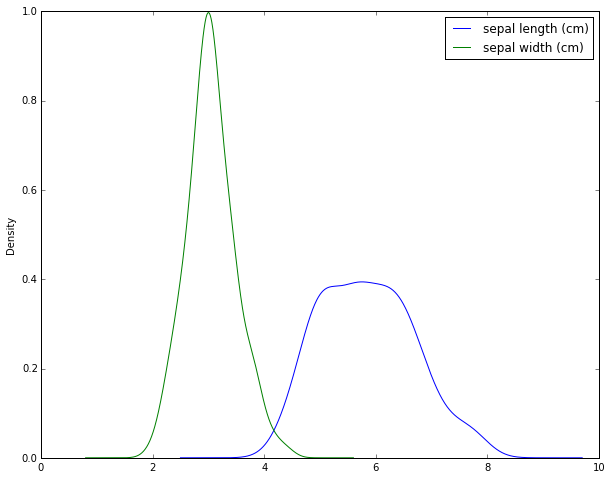

In [30]:
dataframe.ix[:,0:2].plot(kind='kde', figsize=(10,8))
# this is to take all rows for the first two columns of the dataframe (or df.iloc[:,0:2])

---

### 2.11 Andrews Curves

They are used to plot multivariate data as a large number of curves that are created using the atributes of samples as coefficients for Fourier series. By coloring these curves per class it is possible to visualize data clustering.

It is a good way to visualize structure in high-dimensional data. Each data point $x={x_1 , x_2, ..., x_d}$ defines a finite Fourrier series:

$f_{x}(t) = \frac{x_1}{\sqrt{2}} + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t)+...$

This function is plotted for $-\pi < t < \pi$. Therefore, each data point may be viewed as a line between $-\pi$ and $\pi$. The formula can be thought of as the projection of the data point onto the vector 

$(\frac{1}{\sqrt{2}}, sin(t), cos(t), sin(2t), cos(2t),...)$

Each df row is a line per category. On the horizontal axis is the $-\pi < t < \pi$ and on the vertical the $f_x(t)$.

*Curves belonging to samples of the same class will usually be closer together and form larger structures!*

In [37]:
from pandas.tools.plotting import andrews_curves

In [42]:
new_df = dataframe;
new_df['Species']=target_df;
new_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


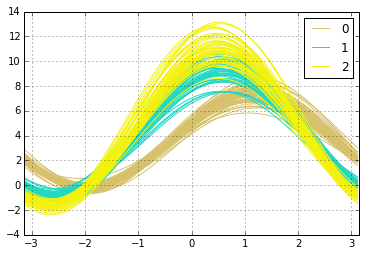

In [33]:
andrews_curves(new_df, "Species")

---

### 2.12 Parallel Coordinates

Parallel coordinates is a way of visualising high-dimensional geometry and analysing multivariate data.

To show a set of points in a n-dimensional space, the horizontal axis is split consisting n parallel vertical (typically) lines. A **point** in the n-dimensional space is represented as a polyline with vertices on the parallel axes; the position of the vertex on the i-th axis corresponds to the i-th coordinate of the point.

This type of visualisation is closely related to **time series** visualisation, with the difference that it is applied on data that have no time dependance.

Three points must be taken into account when the plot is used for statistical inference:
1. The **order** of the axis is critical for finding features (many reorderings are done in practice).
2. The **rotation** of the axis is a translation in the parallel coordinates; if the lines intersected outside the parallel axes, it can be translated between them by rotations (i.e. 180$\circ$).
3. The **scaling** is necessary since the plot is based on interpolation of consecutive pairs of variables. Thus the variables must be on a common scale and orthogonal to each parallel axis. 

*Points that tend to cluster will appear closer together*.

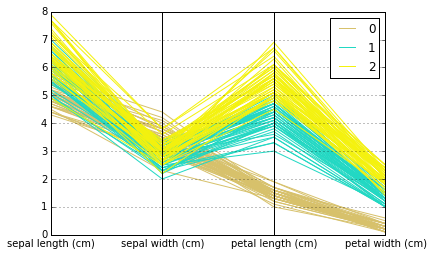

In [34]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(new_df, "Species")

---
### 2.13 Lag plot

Lag plots are used to identify randomness in data. Random data should not exhibit any structure in the lag plot

*Non-random structure implies that data are **not** random.*


*A lag is a fixed time displacement. For example, given a dataset $Y1,~Y2~...,~Yn$, $Y2$ and $Y7$ have lag $5$ since $7 - 2 = 5$. Lag plots can be generated for any arbitrary lag, although the most commonly used lag is $1$.*

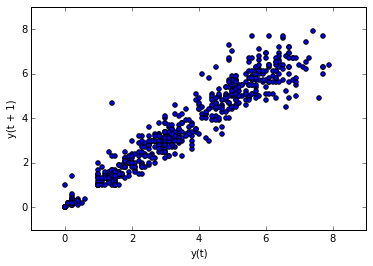

In [35]:
from pandas.tools.plotting import lag_plot
lag_plot(new_df)

---

### 2.14 Autocorrelation Plot

This is to check **randomness** in series. It computes the autocorrelations for data values at varying time lags. 

*If series are random, the autocorrelation should be near zero for any and all time-lag separation.*

*If time series are non-random then one or more of the autocorrelations will be **significantly** non-zero. *

The horizontal lines correspond to the 95% and 99% confidence bands (dashed = 99%)

#### definitions:

- **Vertical axis** : autocorrelation coefficient: $R_{h}=C_{h}/ C_{0}$, 

    where $C_{h}$ is the autocovariance :

    $$C_{h} = \frac{1}{N} \sum_{t=1}^{N-h}(Y_{t}-\bar{Y})(Y_{t+h}-\bar{Y})$$

    and $$C_{0} = \frac{\sum_{t=1}^{N}(Y_{t}-\bar{Y})^{2}}{N}$$

    ** $-1 \leq R_{h}\leq 1$ **

    N.B. Some times the the autocovariance function is given as 

    $$C_{h} = \frac{1}{N-h} \sum_{t=1}^{N-h}(Y_{t}-\bar{Y})(Y_{t+h}-\bar{Y})$$

    which has less bias (1/N-h) 
    
        
- **Horizontal Axis**: time lag $h$, $h=(1,2,...)$

- The above line containes several **reference lines** :
    - the middle line is at zero
    - the other four lines are the 95% and 99% confidence bands. Note that there are two distinct formulas for generating confidence bands.
        - if the autocorrelation plot is being used to test randomness (no time dependence in data) the following formula is recomended $$CL = \pm\frac{z_{1-a/2}}{\sqrt{N}}$$, where $N$ is the sample size, $z$ the cumulative distribution function of the standard normal distribution and $\alpha$ the the significance level 
        - if autocorrelation plot is made using the [ARIMA model fitting](http://www.itl.nist.gov/div898/handbook/pmc/section4/pmc446.htm) then the the confidence bands are generated by : $$CL= \pm  z_{1-a/2} \cdot \sqrt{ \frac{1}{N}(1+2\sum_{i}^{k}y_{i}^2) } $$ where $k$ is the lag, $N$ the sample size, $z$ the cumulative distribution function of the standard normal distribution and $\alpha$ the significance level.
    


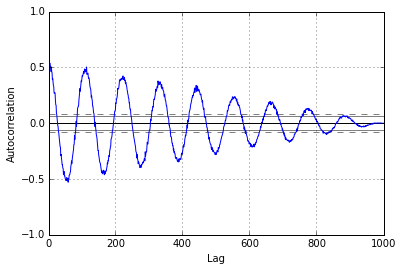

In [36]:
from pandas.tools.plotting import autocorrelation_plot
data = pd.Series(0.7 * np.random.rand(1000) +
                 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))

autocorrelation_plot(data)

---

### 2.15 [Bootstrap plot](http://www.itl.nist.gov/div898/handbook/eda/section3/bootplot.htm)

Bootstrap plots are made to assess the **uncertainty of a statistic metric** (mean, median, midrange etc)

To make a bootstrap uncertainty estimate for one metric given a dataset, a subset of the sample of size les or equal to the size of the dataset is generated from the data and the statistic is calculated. This subset is generated **with replacement**, and thus each data point can be resampled multiple times or not at all. The process is repeated, usually 500 to 1000 times. The computed values for the statistic form an estimate of the sampling distribution of the statistics.


For example, in a sample of 50 values you want to bootstrap the median. You generate a subset of the sample with 50 elements and calculate the median. Repeat this 500 times, so that you have at least 500 values for the median. To calculate the 90% confidence interval for the median, the sample of medians are sorted into ascending order and the value of the 25th median is the lower confidence limit, while the value of 475th median is the upper confidence limit (first and third quartiles).

The plots generated are the series and the histograms for mean, median and mid-range. ** For uniformly distributed values, mid-range has the smallest variance**. 



In [ ]:
from pandas.tools.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000));
    
bootstrap_plot(data, size=50, samples=500, color='grey')    

---

### 2.16 RadViz Plot


RadVis is a way to visualise multivariate data; to visualise n-dimensional points into a two dimensional space. In this case, the mapping is **not linear**. The technique is based on a *simple spring tension minimization algorithm*.

Imagine $n$ points, $S_1,S_2,...S_n$ arranged to be equally spaced around the cirumference of the unit circle. Now suppose a set of $n$ springs being fixed at one end to each of these points and the other ends to a puck. Finally, assume the stiffness constant (as in Hooke's law) of the j$th$ string in the $x_{ij}$ for one of the data points $i$. 

If the puck is released and allowed to reach equilibrium position, the coordinates of this position, $(u_i, v_j)^{T}$, are the projection in the two dimensional space of the point $(x_{i1}, x_{i2}, ... x_{in})^{T}$ in the $n$-dimensional space. If the $(u_i, v_j)^{T}$ is computed for $i=1,2...n$ and the points plotted, a visualisation of the $n$-dimensional dataset in the two dimensions is achieved.

To understand more about the projection of the $n$-dimensional space into the two dimensional one, consider the forces acting on the puck. When the puck is in equilibrium, there are no resultant forces acting on it (their sum is 0). Denoting the position vectors of $S_1$ to $S_n$ by $\mathbf{S_1}$ to $\mathbf{S_n}$ and putting $\mathbf{u_{i}}=(u_i, v_i)^{T}$ we have:

$$\sum_{j=1,n}=(\mathbf{S}_{j}-\mathbf{u}_{i})x_{ij} = 0 $$

which when solved for $\mathbf{u}_{i}$ :

$$\mathbf{u}_{i} = \sum_{j=1,n}w_{ij}\mathbf{S}_j$$

where 

$$ w_{ij} = \left( \sum_{j=1,n} x_{ij} \right)^{-1} x_{ij}$$

This means that for each $i$ (i.e. dataframe row), $\mathbf{u_i}$ is the **weighted mean** of the $\mathbf{S_j}$'s whose weights are the $n$ variables for case $i$ normalised to unity. 

**N.B. This normalisation makes the mapping $\mathcal{R}^{n}\rightarrow \mathcal{R}^{2}$ non-linear.**

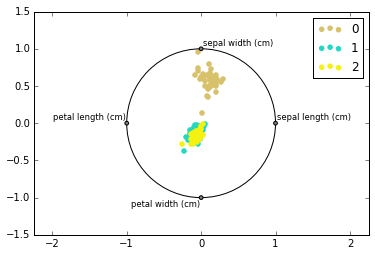

In [52]:
from pandas.tools.plotting import radviz

radviz(new_df, 'Species')

----
----

## 3. Data Holders

Now let's do see some 'data wrangling' commands with pandas framework. These are to re-shape, select and extract information from a given dataset.

Let's dive a bit into the different [data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro)


### 3.1. Series

Series is in fact an 1D array with labels that holds a specific data type (double, int, string etc). The labels (**axis labels**) are referred to as **index**. 

To create a Series you need `data` and an `index` definition. 

- Data can be:
    - dictionary
    - ndarray
    - scalar value (i.e. 5)

- Index can be:
    - any list of strings 
    
If no index is included in the definition, the indices will be numerical from 0 to len(ndarray)-1.


#### 3.1.1. Series from [ndarray](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html)



In [ ]:
s = pd.Series(np.random.randn(5), index = ['a','b','c','d','e']) 
                                    # 5 is the # of observations
                                    # only one axis in tuple -> only 1D series

In [ ]:
s

In [ ]:
s.plot(kind='kde')

---
this does not work for a 2D ndarray


In [ ]:
#s = pd.Series(np.random.randn(5,5)) # this returns an exception : Data must be 1-dimensional

---

#### 3.1.2. Series from dictionary

Generating from a dictionary, the keys are taken as index.
If extra index argument is given  this the keys values are overwritten for the matching cases, while if the `index` argument is larger than the `len(dict.keys())` then **NaN**'s are created.

In [ ]:
d = {'a':125., 'b':500, 'c':400, 'e':240}; d

In [ ]:
s2 = pd.Series(d); s2

In [ ]:
s2.plot(kind='bar', alpha=0.8, color='pink', ylim=(0, 1000))

In [ ]:
s3 = pd.Series(d, index=['a','b','c','d','e','f']); s3

In [ ]:
s3.plot(kind='bar', alpha=0.8, color='cyan', ylim=(0, 1000))

---
So indeed the series are filled with NaN's and the plots with 0's!.

---
#### 3.1.3. Series from scalar

Now introducing series with scalar input, the values will all be identical.



In [ ]:
s4 = pd.Series(5, index=['a','b','c']); s4

---

Series can behave as ndarrays or as dictionaries including all the operations!
For example

In [ ]:
s2[3]

In [ ]:
s2[:4]

In [ ]:
s2.median(); s2.mean(); s2.std(); s2.quantile(0.50)

In [ ]:
s2[s2>s2.median()]

In [ ]:
s2['a']

In [ ]:
'a' in s2

---

Also vectorised operations can be done. The difference with ndarray is that the **result is aligned automatically based on the labels**.

In [ ]:
s+s2; s2*2; np.exp(s)

In [ ]:
s5 = pd.Series(np.random.randn(5), name='something'); s5.name

---

---

### 3.2  DataFrames

On the other side, we have **DataFrames**. A dataframe is like an Excel spreadsheet or a SQL table. Dataframes can accept various many different kinds of inputs

- Dictionay of 1D ndarrays, lists, dict or Series
- 2D numpy.ndarray
- structured or record ndarray
- series
- another DataFrame

Apart from data, the input arguments can be **columns** and **index**.

#### 3.2.1 DataFrame from dict of Series or dicts

The result index will be the union of the indexes of the various Series. Nested dicts will be converted to Series first.

In [ ]:
d = {'one' : pd.Series([1.,2.,3.], index = ['a','b','c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a','b','c','d']) }; d

In [ ]:
df = pd.DataFrame(d); df

In [ ]:
pd.DataFrame(d, index = ['d','b','a']) # rearanging stuff

In [ ]:
pd.DataFrame(d, index = ['d','b','a'], columns=['two' , 'three']) # there is no 'three' col

The **index** and **columns** can be accessed directly:

In [ ]:
df.index

In [ ]:
df.columns

---

#### 3.2.2 DataFrame from dict of ndarrays/lists


In [ ]:
d = {'one' : [1.,2.,3.,4.],
     'two' : [4.,3.,2.,1.]}; d 

In [ ]:
pd.DataFrame(d)

In [ ]:
pd.DataFrame(d, index=['a','b','c','d'])

---

#### 3.2.3 DataFrame from [structured/record arrays](http://docs.scipy.org/doc/numpy/user/basics.rec.html)

These arrays are made using named indices.

For example



In [ ]:
x = np.array([(1,2,'Hello'), (2,3,'World') ],
             dtype=[('foo','i4'),('bar','f4'), ('baz', 'S10')])   # structured array

In [ ]:
x[0]

In [ ]:
x['foo']

In [ ]:
x.dtype.names

In [ ]:
x[['foo','bar']]  # access multiple fields simultaneously

----

In [ ]:
y = np.rec.array([(1,2.,'Hello'),(2,3.,"World")], 
                          dtype=[('foo', 'i4'),('bar', 'f4'), ('baz', 'S10')]) ## record array

In [ ]:
y[0]

In [ ]:
y['foo']

In [ ]:
y.dtype.names

In [ ]:
y[['foo','bar']]  # access multiple fields simultaneously

In [ ]:
y[1].baz  # access one element

---

So now making a DF from such arrays:


In [ ]:
data = np.zeros((2,), dtype=[('A', 'i4'),('B', 'f4'),('C', 'a10')])

In [ ]:
data[:] = [(1,2.,'Hello'), (2,3.,"World")]

In [ ]:
pd.DataFrame(data)

In [ ]:
pd.DataFrame(data, index=['first', 'second'])

In [ ]:
pd.DataFrame(data, columns=['C', 'A', 'B'])

---

### 3.2.4 DataFrame from list of dicts

Now make a list of dictionaries

In [ ]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [ ]:
pd.DataFrame(data2)

---

### 3.2.5 DataFrame from dict of tuples

Now make a dict containing tuples:


In [ ]:
pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
                ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
                ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

---

### 3.2.6 DataFrame from Series


This is including various series for the creation of a DF

----

----



## 4. Dealing with problematic data